<a href="https://colab.research.google.com/github/LeonidGrekhov/CMPE297Section1FinalProject/blob/main/craigslistAds2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6
https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5
https://raleigh.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4
https://raleigh.craigslist.org/search/cta?s=240&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
3
https://raleigh.craigslist.org/search/cta?s=360&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
2
https://raleigh.craigslist.org/search/cta?s=480&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
1
https://raleigh.craigslist.org/search/cta?s=600&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
6
https://boone.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5
https://boone.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4
https://boone.craigslist.org/search/cta?s=240&min_price=500&ma

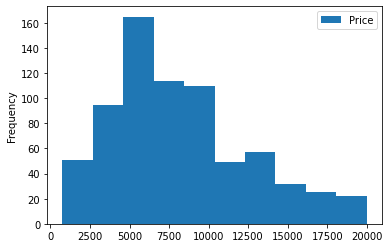

Boone


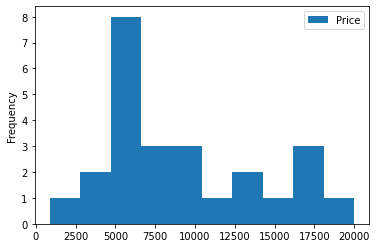

In [19]:
from bs4 import BeautifulSoup #web scraping

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import re
import requests #http requests
from requests import get
from urllib.request import urlopen
def craigs_list(locations, min_price, max_price, min_year, max_year):
    
    dfs = []
    master = []

    for location in locations:
        
        s = 0
        ##https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
        ##https://sfbay.craigslist.org/search/cta?hasPic=1#search=1~gallery~0~0
        url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
        r  = requests.get(url)
        html_page = r.text
        soup = BeautifulSoup(html_page, "lxml")
        #total = str(soup.findAll("span", {"class": "totalcount"})[0].contents)[2:-2]
        count = 6
        
        while(count > 0):
            print(count)
            url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
            print(url)
            r  = requests.get(url)
            html_page = r.text
            soup = BeautifulSoup(html_page, "lxml")
            
            values = add_to_df(soup)
            s = s + 120
            count = count - 1


            craig_df = pd.DataFrame(np.column_stack([values[0], values[1], values[2],values[3], values[4], values[5]]),
                columns = ["Price", "Location","Title","Link", "Date", "Description"])
            craig_df = craig_df.dropna()
           
            dfs.append(craig_df)
        
            craig_df = 0
            
        #concat all dfs here
        d = pd.concat(dfs)
        master.append(d)
        d=[]
        dfs = []
        
    
    return master
    
	
	
def graph_cars(df):
    df2 = df.iloc[:, :2].copy()
    df2['Price'] = df2['Price'].str[1:]
    df2['Price'] = df2['Price'].str.replace(',', '').astype(int)
    df2.plot(kind='hist', y = "Price")
    plt.show()
	
def remove_html_tags(text):
    substring = "QR Code Link to This Post"
    text = text.split(substring)
    text = re.sub("{<p[^>]*</p>}", "", text[1])
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def remove_empty_line(text):
    clean = re.compile('^(?:[\t ]*(?:\r?\n|\r))+')
    return re.sub(clean, '', text)

def add_to_df(soup):
    link_list = []
    listing_price = []
    prices = []
    hoods = []
    titles = []
    make_model = []
    year = []
    miles = []
    odometer = []
    date = []
    description = []
   
 
    for car in soup.find_all('li', class_= 'result-row'):
            
        try:
            location = str(car.find(class_ = "result-hood").contents)
            hoods.append(location[4:-3])
        except:
            hoods.append('N/A')
                
        try:
            prices.append(car.find(class_ = "result-price").contents)
        except:
            #not possible
            prices.append('N/A')
                
        try:
            titles.append(car.find(class_ = "result-title hdrlnk").contents)
        except:
            titles.append('N/A')
                
        try:
            date.append(car.find(class_ = "result-date").contents)
        except:
            date.append('N/A')
        
        
        try:
            requests = get(car.find('a')['href'])
            html_soup = BeautifulSoup(requests.text, "lxml")
            posting_body=html_soup.find('section',{'id':'postingbody'})
            posting_body= remove_html_tags(str(posting_body.text))
            text = remove_empty_line(posting_body)
            description.append(text)
        except:
            description.append('N/A')
                   
        
    for car in soup.findAll("a", {"class": "result-title hdrlnk"}):
        link_list.append(car['href'])
        
        

    return [prices, hoods, titles, link_list, date, description]
	
	
	
locations = ["raleigh", "boone"]
min_price = 500
max_price= 20000
min_year = 2000
max_year = 2010
df = craigs_list(locations, min_price, max_price, min_year, max_year)
	
	
print("Raleigh")
graph_cars(df[0])
print("Boone")
graph_cars(df[1])


# Description Data Frame
# Addition: Car model, Vin, Condition, drive, fuel, odometer, title status, transmission, type

In [20]:
df1 = pd.DataFrame(df[0]) 
df2 = pd.DataFrame(df[1]) 

In [21]:
display(df1)

,Price,Location,Title,Link,Date,Description
0,"$5,100","Hillsborough, NC",2008 Mercury GMarq,https://raleigh.craigslist.org/cto/d/hillsboro...,Oct 23,Nice car - two owners\nlow mileage\n
1,"$3,600",Bailey,2004 Tahoe,https://raleigh.craigslist.org/cto/d/bailey-20...,Oct 23,2004 tahoe z71\nBody in great shape 4x4 works ...
2,"$14,500",Chapel Hill,2004 E-320 Mercedes Wagon,https://raleigh.craigslist.org/cto/d/chapel-hi...,Oct 23,"Beautiful to see and a pleasure to drive, this..."
3,"$13,950","Apex, NC",2007 FORD E-350 ** 15 PASSENGER VAN ** 109K MI...,https://raleigh.craigslist.org/cto/d/apex-2007...,Oct 23,I am selling a beautiful 2007 Ford E-350 / 15 ...
4,"$9,995",Warrenton,2004 Volvo S60 R AWD 6-Speed,https://raleigh.craigslist.org/cto/d/warrenton...,Oct 23,Ultra-rare 2004 Volvo S60R AWD 6-speed with on...
...,...,...,...,...,...,...
115,"$5,990",Raleigh NC,2005 Nissan Xterra,https://raleigh.craigslist.org/ctd/d/memphis-2...,Sep 26,"2005 Nissan Xterra - $5,990\n\nYear: 2005\nMak..."
116,"$8,990",Raleigh NC,2009 Subaru Forester 2.5 X,https://raleigh.craigslist.org/ctd/d/memphis-2...,Sep 26,"2009 Subaru Forester 2.5 X - $8,990\n\nYear: 2..."
117,"$5,990",Raleigh NC,2004 Pontiac Vibe,https://raleigh.craigslist.org/ctd/d/memphis-2...,Sep 26,"2004 Pontiac Vibe - $5,990\n\nYear: 2004\nMake..."
118,"$14,999",Cardinal Auto Sales,2009 GMC Sierra 2500HD 2500 HD 2500-HD Ext Cab...,https://raleigh.craigslist.org/ctd/d/raleigh-2...,Sep 26,2009 GMC Sierra 2500HD 2500 HD 2500-HD Ext Cab...


In [26]:
display(df2)

,Price,Location,Title,Link,Date,Description
0,"$6,000",Boone,2006 Honda CR-V Special Edition,https://boone.craigslist.org/cto/d/boone-2006-...,Oct 22,"6000 OBO price isn’t firm\n\nHas remote start,..."
1,"$8,000",Boone,2006 Ford E 450 Van,https://boone.craigslist.org/cto/d/boone-2006-...,Oct 22,2006 Ford E 450 gas Passenger Van. Luxury viny...
2,"$9,500",West Jefferson NC,2006 Mazda Miata,https://boone.craigslist.org/cto/d/west-jeffer...,Oct 21,Well kept Miata with 6-speed manual. Grand Tou...
3,"$15,000",Boone,Subaru Sti 2008,https://boone.craigslist.org/cto/d/boone-subar...,Oct 21,I’m selling my 08 sti hatch because it recentl...
4,"$12,590",TOUCHLESS DELIVERY TO YOUR HOME,2009 Volvo C30 T5 Hatchback 2D hatchback White...,https://boone.craigslist.org/ctd/d/boone-2009-...,Oct 21,"At Carvana, we go miles beyond the extra mile...."
5,"$12,990",TOUCHLESS DELIVERY TO YOUR HOME,2009 smart fortwo Passion Cabriolet 2D Convert...,https://boone.craigslist.org/ctd/d/boone-2009-...,Oct 19,"At Carvana, we go miles beyond the extra mile...."
6,"$4,950",Jonesville,2004 Honda Pilot EX,https://boone.craigslist.org/ctd/d/jonesville-...,Oct 18,V-6 Automatic. All Wheel Drive.\nPower Window...
7,"$10,000","Boone, NC",2010 Subaru Forester,https://boone.craigslist.org/cto/d/boone-2010-...,Oct 18,"Clean with ALL NEW... premium head gasket,timi..."
8,"$12,000",N/A,2004 f250,https://boone.craigslist.org/cto/d/west-jeffer...,Oct 16,2004 f250 lariat crew cab powerstroke was conv...
9,"$4,300",Boone,2009 NISSAN ALTIMA 2.5S,https://boone.craigslist.org/cto/d/boone-2009-...,Oct 16,"2009 NISSAN ALTIMA 2.5S 130,500 original miles..."


In [22]:
df1.iloc[35]['Description']

'New tires, oil change and state inspection. Was $4900, now $3900. Call Craig anytime at 919-819-0744.\n\nMorrisville Auto Sales\n10214 Chapel Hill Rd\nMorrisville NC 27560\n'

In [24]:
from google.colab import files

df1.to_csv('df1.csv', encoding = 'utf-8-sig') 
files.download('df1.csv')
df2.to_csv('df2.csv', encoding = 'utf-8-sig') 
files.download('df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
df1.size

4320

In [27]:
text =str(df1.iloc[35]['Description'])

In [29]:
pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 441 kB 29.1 MB/s 
     |████████████████████████████████| 5.3 MB 70.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.0 MB/s 
     |████████████████████████████████| 212 kB 58.7 MB/s 
     |████████████████████████████████| 163 kB 61.4 MB/s 
     |████████████████████████████████| 115 kB 75.6 MB/s 
     |████████████████████████████████| 127 kB 48.0 MB/s 
     |████████████████████████████████| 7.6 MB 46.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [30]:
from happytransformer import  HappyTextToText

In [31]:
happy_tt = HappyTextToText("DISTILBART", "sshleifer/distilbart-cnn-12-6")

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [32]:
result = happy_tt.generate_text(text)

In [33]:
print(result.text)

 New tires, oil change and state inspection now available at $3900 . New tires, oil change and state inspection now available .


In [34]:
from happytransformer.happy_text_to_text import TTSettings
top_k_sampling_settings = TTSettings(do_sample=True, top_k=100, temperature=0.7, max_length=100)

In [35]:
result = happy_tt.generate_text(text, args= top_k_sampling_settings)

In [36]:
print(result.text)

 The low-rent tire deal was for $4900. New tires, oil change and state inspection. Was $4900, now $3900. Call Craig anytime at 919-819-0744.
